# **Listas de Aristas Doble-Conectadas**

**Ejercicio**

Construir la lista de aristas doble conectadas del polígono con vértices:
$$P = \{(5,1), (8,3), (5-2), (-1,-1), (1,5)\}$$

Listas:
- Nodos
- Semi-aristas
- caras

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
class Point:
  #constructor
  def __init__(self, x, y, name):
    self.x = x
    self.y = y
    self.name = name

  #metodos de la clase
  def __repr__(self):
    return(f"({self.x}, {self.y})")

  def __str__(self):
    return(f"({self.x}, {self.y})")

In [36]:
class Segment:
  def __init__(self, startp, endp):
    self.startp = startp
    self.endp = endp

  def __str__(self):
    return(f"(Punto inicial: {self.startp}, Punto final: {self.endp})")

In [37]:
p = [Point(1,5,'p1'), Point(-1,-1,'p2'), Point(2,2, 'p3'), Point(5,-2,'p4'), Point(8,3,'p5'), Point(5,1,'p6')]

In [59]:
def polygon(points):
  xcoor = []
  ycoor = []
  for i in points:
    plt.scatter(i.x, i.y, marker = 'o', color = 'blue')
    xcoor.append(i.x)
    ycoor.append(i.y)
  xcoor.append(points[0].x)
  ycoor.append(points[0].y)
  plt.plot(xcoor, ycoor,color = 'limegreen')
  plt.grid(True)
  plt.show()

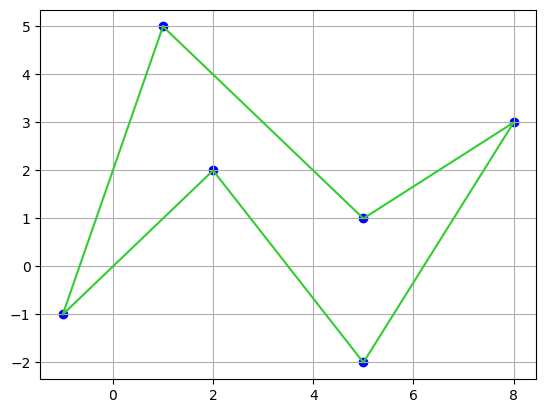

In [39]:
polygon(p)

In [40]:
class semiArista:
  def __init__(self, startp, endp):
    self.startp = startp
    self.endp = endp
    self.twin = semiArista(endp, startp)
    self.prev = None
    self.next = None
    self.face = None


  def __str__(self):
    return (f"(Punto inicial: {self.startp}, Punto final: {self.endp})")

--------------------------------------------------------------------------
Solución propuesta:


In [41]:
p = [Point(1,5,'p1'), Point(-1,-1,'p2'), Point(2,2, 'p3'), Point(5,-2,'p4'), Point(8,3,'p5'), Point(5,1,'p6')]

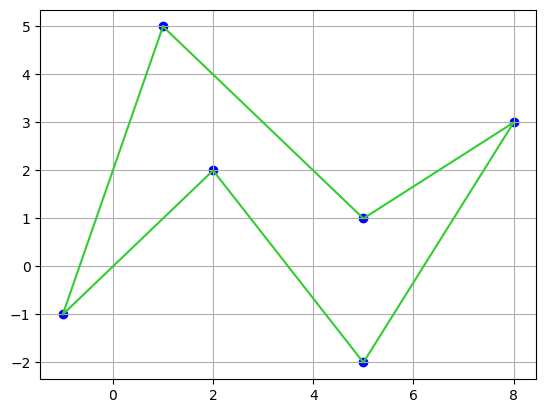

In [42]:
polygon(p)

In [43]:
class Node:
  def __init__(self, label, coor, IncidentEdge):
    self.label = label
    self.coor = coor
    self.IncidentEdge = IncidentEdge
  def __repr__(self):
    return f"{self.label}"

In [44]:
nodo = Node("n", Point(0,1,'p'), 'e11')
print(nodo)
print(nodo.coor)
print(nodo.IncidentEdge)

n
(0, 1)
e11


In [45]:
nodes = []
for n in range(len(p)):
  nodes.append(Node("n"+str(n), #nombre
                    p[n], #coordenada
                    "e"+str(n)+str(1))) #arista incidente

In [46]:
print("Nodes", " ", "Coor", " ", "Inc.Edge")
for n in range(len(p)):

  print(nodes[n].label, " ", "(",nodes[n].coor.x,",",nodes[n].coor.y,")", " ", nodes[n].IncidentEdge)

Nodes   Coor   Inc.Edge
n0   ( 1 , 5 )   e01
n1   ( -1 , -1 )   e11
n2   ( 2 , 2 )   e21
n3   ( 5 , -2 )   e31
n4   ( 8 , 3 )   e41
n5   ( 5 , 1 )   e51


In [47]:
def twin(x):
  if x[2] == "1":
    return str(x[0]+x[1]+"2")
  else:
    return x[0] + x[1] + "1"

In [48]:
class SemiEdge:
  def __init__(self, label, origin, twin, next, prev, face):
    self.label = label
    self.origin = origin
    self.twin  = twin
    self.next = next
    self.prev = prev
    self.face = face

  def __repr__(self):
    return f"{self.label}"


In [60]:
class HalfEdge:
  def __init__(self, startp, endp):
    self.startp = startp
    self.endp = endp
    self.twin = None
    self.next = None
    self.prev = None
    self.face = None

  def __repr__(self):
    return(f"(inicio: {self.startp}, final: {self.endp})")

In [61]:
def EdgesList(points):

  edges = []
  for i in range(len(points)-1):
    e = HalfEdge(points[i], points[i+1])
    edges.append(e)

  edges.append(HalfEdge(points[-1], points[0]))
  return edges

In [62]:
def AssignValues (edges):


  for i in range(len(edges)-1):
    e = edges[i]
    e.next = edges[i+1]
    e.prev = edges[i-1]

  e = edges[-1]
  e.next = edges[0]
  e.prev = edges[-2]

  return edges

In [56]:
edges = EdgesList(p)
edges = AssignValues(edges)


In [57]:
def ListOfedges(edges):
    names, origin, twins, next, prev = [],[],[],[],[]
    for e in edges:
      names.append(e)
      origin.append(e.startp)
      twins.append(e.twin)
      next.append(e.next)
      prev.append(e.prev)

    df = {'Arista': names, 'Origen': origin, 'Twin': twins, 'Next': next, 'Previous': prev}
    dcel = pd.DataFrame(df)

    return dcel

In [58]:
ListOfedges(edges)

,Arista,Origen,Twin,Next,Previous
0,"(inicio: (1, 5), final: (-1, -1))","(1, 5)",None,"(inicio: (-1, -1), final: (2, 2))","(inicio: (5, 1), final: (1, 5))"
1,"(inicio: (-1, -1), final: (2, 2))","(-1, -1)",None,"(inicio: (2, 2), final: (5, -2))","(inicio: (1, 5), final: (-1, -1))"
2,"(inicio: (2, 2), final: (5, -2))","(2, 2)",None,"(inicio: (5, -2), final: (8, 3))","(inicio: (-1, -1), final: (2, 2))"
3,"(inicio: (5, -2), final: (8, 3))","(5, -2)",None,"(inicio: (8, 3), final: (5, 1))","(inicio: (2, 2), final: (5, -2))"
4,"(inicio: (8, 3), final: (5, 1))","(8, 3)",None,"(inicio: (5, 1), final: (1, 5))","(inicio: (5, -2), final: (8, 3))"
5,"(inicio: (5, 1), final: (1, 5))","(5, 1)",None,"(inicio: (1, 5), final: (-1, -1))","(inicio: (8, 3), final: (5, 1))"
